<a href="https://colab.research.google.com/github/Prateek-1110/seb_dl/blob/main/24may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**LECT 4.3**

In [81]:
X = torch.arange(6).view(2,3)
print(X)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [82]:
w = torch.tensor([1,2,3])
X.matmul(w)

tensor([ 8, 26])

In [83]:
# w = w.view(-1,1) -> this reshape the w tensor as (1,2,3)but in 1x3 not in 3x1( horizontal se vertical ho jayega)
print(w)
y = X@w
print(y)


tensor([1, 2, 3])
tensor([ 8, 26])


In [84]:
print(y+torch.tensor([2,3]))

tensor([10, 29])


**Lect 4.5**

In [85]:
x = torch.arange(50,dtype = torch.float).view(10,5)
print(x)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])


In [86]:
fc_layer = torch.nn.Linear(in_features=5 , out_features=3)
# this means 5 input feature and 3 output feature

In [87]:
fc_layer.weight
# these values are random , no relation with anything

Parameter containing:
tensor([[ 0.0017,  0.3866,  0.4117,  0.2763,  0.1114],
        [-0.2727, -0.2873,  0.0683,  0.3245,  0.0430],
        [ 0.2816,  0.3589,  0.3758, -0.1991, -0.1986]], requires_grad=True)

In [88]:
fc_layer.bias


Parameter containing:
tensor([0.3801, 0.0786, 0.3853], requires_grad=True)

In [89]:
print('X dim:',x.size())
print('W dim:',fc_layer.weight.size())
print('b dim:',fc_layer.bias.size())
A = fc_layer(x)
print('A: ',A)
print('A dim: ',A.size())

# x has dim [10,5] as we initialise x as 10,5 then W  has dim [3,5] like we have 5 input , 3 output layers
#  b has 3 as dimension as [3] output layer , A has [10 , 3] as dim as we transpose w and then A has dim of n x h

X dim: torch.Size([10, 5])
W dim: torch.Size([3, 5])
b dim: torch.Size([3])
A:  tensor([[ 2.8644,  1.0735,  0.1042],
        [ 8.8028,  0.4529,  3.1971],
        [14.7411, -0.1676,  6.2901],
        [20.6794, -0.7881,  9.3831],
        [26.6178, -1.4087, 12.4761],
        [32.5561, -2.0292, 15.5691],
        [38.4945, -2.6497, 18.6621],
        [44.4328, -3.2703, 21.7550],
        [50.3711, -3.8908, 24.8480],
        [56.3095, -4.5114, 27.9410]], grad_fn=<AddmmBackward0>)
A dim:  torch.Size([10, 3])


**Some useful rules**.................

1. AB = (B.T . A.T).T
2. (AB).T = B.T . A.T

**CHAP 5**

Linear regression

In [90]:
df = pd.read_csv("/content/linreg-data.csv",index_col=0)
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [91]:
df.shape

(1000, 3)

In [92]:
X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [93]:
class LinearRegression1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)

    def backward(self, x, yhat, y):

        grad_loss_yhat = 2*(yhat - y)

        grad_yhat_weights = x
        grad_yhat_bias = 1.

        # Chain rule: inner times outer
        grad_loss_weights =  torch.mm(grad_yhat_weights.t(),grad_loss_yhat.view(-1, 1)) / y.size(0)

        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        # return negative gradient
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [94]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):
      yhat = model.forward(x)
      negative_grad_w, negative_grad_b = model.backward(x, yhat, y)
      model.weights += learning_rate * negative_grad_w
      model.bias += learning_rate * negative_grad_b
      yhat = model.forward(x) # not that this is a bit wasteful here
      curr_loss = loss(yhat, y)
      print('Epoch: %03d' % (e+1), end="")
      print(' | MSE: %.5f' % curr_loss)
      cost.append(curr_loss)

    return cost

In [95]:
model = LinearRegression1(num_features=X_train.size(1))
cost = train(model, X_train, y_train, num_epochs=100, learning_rate=0.05)

Epoch: 001 | MSE: 1532.67603
Epoch: 002 | MSE: 1312.39868
Epoch: 003 | MSE: 1133.91809
Epoch: 004 | MSE: 989.30286
Epoch: 005 | MSE: 872.12592
Epoch: 006 | MSE: 777.18097
Epoch: 007 | MSE: 700.24915
Epoch: 008 | MSE: 637.91241
Epoch: 009 | MSE: 587.40167
Epoch: 010 | MSE: 546.47284
Epoch: 011 | MSE: 513.30811
Epoch: 012 | MSE: 486.43430
Epoch: 013 | MSE: 464.65799
Epoch: 014 | MSE: 447.01224
Epoch: 015 | MSE: 432.71332
Epoch: 016 | MSE: 421.12634
Epoch: 017 | MSE: 411.73697
Epoch: 018 | MSE: 404.12827
Epoch: 019 | MSE: 397.96249
Epoch: 020 | MSE: 392.96603
Epoch: 021 | MSE: 388.91708
Epoch: 022 | MSE: 385.63583
Epoch: 023 | MSE: 382.97684
Epoch: 024 | MSE: 380.82202
Epoch: 025 | MSE: 379.07571
Epoch: 026 | MSE: 377.66052
Epoch: 027 | MSE: 376.51367
Epoch: 028 | MSE: 375.58420
Epoch: 029 | MSE: 374.83102
Epoch: 030 | MSE: 374.22055
Epoch: 031 | MSE: 373.72586
Epoch: 032 | MSE: 373.32489
Epoch: 033 | MSE: 372.99994
Epoch: 034 | MSE: 372.73657
Epoch: 035 | MSE: 372.52313
Epoch: 036 | MSE:

modifying train function to shuffle dataset prior to each epoch

In [96]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)

def train1(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):
        # Shuffle the dataset
        indices = np.random.permutation(len(x))
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # Forward and backward pass on shuffled data
        yhat = model.forward(x_shuffled)
        negative_grad_w, negative_grad_b = model.backward(x_shuffled, yhat, y_shuffled)
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        # Compute loss (can be done on original or shuffled set)
        yhat = model.forward(x_shuffled)  # Optional second forward
        curr_loss = loss(yhat, y_shuffled)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)


In [97]:
model = LinearRegression1(num_features=X_train.size(1))
cost = train1(model, X_train, y_train, num_epochs=100, learning_rate=0.05)

Epoch: 001 | MSE: 1532.67603
Epoch: 002 | MSE: 1312.39819
Epoch: 003 | MSE: 1133.91809
Epoch: 004 | MSE: 989.30280
Epoch: 005 | MSE: 872.12598
Epoch: 006 | MSE: 777.18109
Epoch: 007 | MSE: 700.24921
Epoch: 008 | MSE: 637.91260
Epoch: 009 | MSE: 587.40173
Epoch: 010 | MSE: 546.47296
Epoch: 011 | MSE: 513.30817
Epoch: 012 | MSE: 486.43439
Epoch: 013 | MSE: 464.65808
Epoch: 014 | MSE: 447.01227
Epoch: 015 | MSE: 432.71332
Epoch: 016 | MSE: 421.12634
Epoch: 017 | MSE: 411.73697
Epoch: 018 | MSE: 404.12830
Epoch: 019 | MSE: 397.96255
Epoch: 020 | MSE: 392.96606
Epoch: 021 | MSE: 388.91705
Epoch: 022 | MSE: 385.63583
Epoch: 023 | MSE: 382.97687
Epoch: 024 | MSE: 380.82202
Epoch: 025 | MSE: 379.07571
Epoch: 026 | MSE: 377.66052
Epoch: 027 | MSE: 376.51367
Epoch: 028 | MSE: 375.58429
Epoch: 029 | MSE: 374.83102
Epoch: 030 | MSE: 374.22055
Epoch: 031 | MSE: 373.72586
Epoch: 032 | MSE: 373.32492
Epoch: 033 | MSE: 372.99997
Epoch: 034 | MSE: 372.73660
Epoch: 035 | MSE: 372.52316
Epoch: 036 | MSE:

In [98]:
# plt.plot(range(len(cost)),cost)
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.show()

In [99]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)
print('Train MSE: %.5f' % loss(train_pred, y_train))
print('Test MSE: %.5f' % loss(test_pred, y_test))

Train MSE: 371.61035
Test MSE: 406.88412


Adaline with mini batch

In [100]:
df = pd.read_csv('/content/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [101]:
df.head()

,x1,x2,x3,x4,y
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [102]:
X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

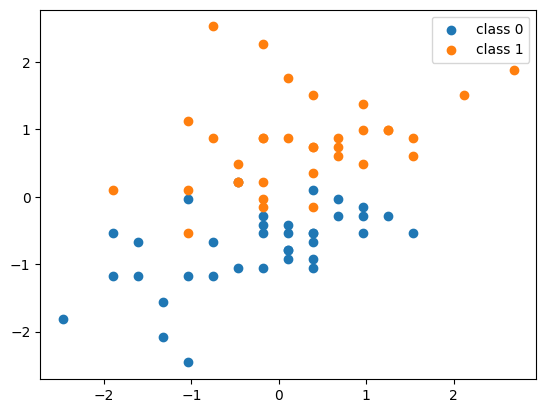

In [103]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1')
plt.legend()
plt.show()

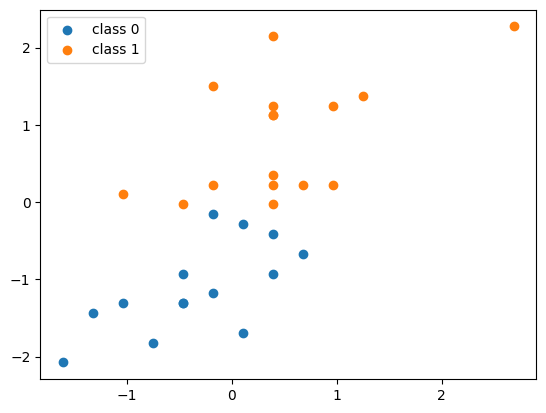

In [104]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

In [105]:
class Adaline1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)

    def backward(self, x, yhat, y):
        grad_loss_yhat = 2*(yhat - y)
        grad_yhat_weights = x
        grad_yhat_bias = 1.
        grad_loss_weights = torch.mm(grad_yhat_weights.t(),grad_loss_yhat.view(-1, 1)) / y.size(0)
        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [106]:

def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []

    torch.manual_seed(seed)
    for e in range(num_epochs):

        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)

        for minibatch_idx in minibatches:

            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b

            #### Logging ####
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [107]:
model = Adaline1(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train.float(),
             num_epochs=20,
             learning_rate=0.1,
             seed=123,
             minibatch_size=10)

    Minibatch MSE: 0.500
    Minibatch MSE: 0.341
    Minibatch MSE: 0.220
    Minibatch MSE: 0.245
    Minibatch MSE: 0.157
    Minibatch MSE: 0.133
    Minibatch MSE: 0.144
Epoch: 001 | MSE: 0.12142
    Minibatch MSE: 0.107
    Minibatch MSE: 0.147
    Minibatch MSE: 0.064
    Minibatch MSE: 0.079
    Minibatch MSE: 0.185
    Minibatch MSE: 0.063
    Minibatch MSE: 0.135
Epoch: 002 | MSE: 0.09932
    Minibatch MSE: 0.093
    Minibatch MSE: 0.064
    Minibatch MSE: 0.128
    Minibatch MSE: 0.099
    Minibatch MSE: 0.079
    Minibatch MSE: 0.157
    Minibatch MSE: 0.080
Epoch: 003 | MSE: 0.09693
    Minibatch MSE: 0.131
    Minibatch MSE: 0.146
    Minibatch MSE: 0.050
    Minibatch MSE: 0.095
    Minibatch MSE: 0.106
    Minibatch MSE: 0.072
    Minibatch MSE: 0.102
Epoch: 004 | MSE: 0.09658
    Minibatch MSE: 0.107
    Minibatch MSE: 0.204
    Minibatch MSE: 0.149
    Minibatch MSE: 0.054
    Minibatch MSE: 0.060
    Minibatch MSE: 0.056
    Minibatch MSE: 0.069
Epoch: 005 | MSE: 0.0

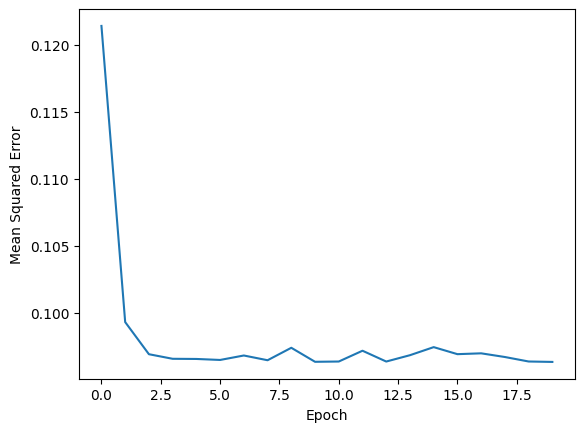

In [108]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [109]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (torch.where(train_pred > 0.5,
                 ones,
                 zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5,
                 ones,
                 zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 90.00
Test Accuracy: 96.67
